# Testing how to make angles on mediapipe output
## Step 1: need to measure angles for:
23 - left hip
24 - right hip
25 - left knee
26 - right knee
27 - left ankle
28 - right ankle
29 - left heel
30 - right heel
31 - left foot index
32 - right foot index --> these are the body landmark coordinates

In [2]:
import math
import cv2
import mediapipe as mp
from time import time
import os
from matplotlib import pyplot as plt

In [3]:
#initializing mediapipe pose class
mp_pose = mp.solutions.pose

#setting up pose function XXXXXX maybe want to edit static image mode
pose = mp_pose.Pose(static_image_mode=True, #False when we'd be using videos
                    min_detection_confidence = 0.3,
                    #min_tracking_confidence
                    model_complexity = 2) #heavy model

#initializing mediapipe drawing class, for annotation
mp_drawing = mp.solutions.drawing_utils

I0000 00:00:1749047551.546987 5283624 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1749047551.690191 5284249 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1749047551.742650 5284251 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


## Reading an image

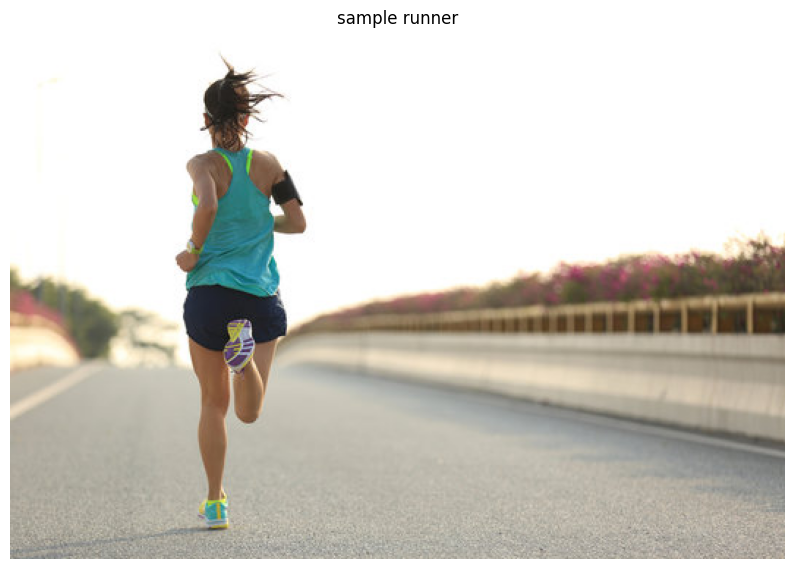

In [4]:
sample_img = cv2.imread('raw_data/sample_runner.jpg')
#specify size of img
plt.figure(figsize = [10, 10])
#display sample image, convert BGR to RGB for display
plt.title('sample runner');
plt.axis('off');
plt.imshow(sample_img[:,:,::-1]);
plt.show();

Perform pose detection on image

In [5]:
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

#check if any landmarks are found
if results.pose_landmarks :
    for i in range(23,33):
        print(f'{mp_pose.PoseLandmark(i).name}:\
              \n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')


LEFT_HIP:              
x: 0.259541482
y: 0.513629854
z: 0.0180921778
visibility: 0.999994874

RIGHT_HIP:              
x: 0.321973324
y: 0.511603594
z: -0.0182951186
visibility: 0.999977469

LEFT_KNEE:              
x: 0.267860532
y: 0.71316421
z: 0.104943328
visibility: 0.30070585

RIGHT_KNEE:              
x: 0.316071928
y: 0.683404088
z: -0.0595997758
visibility: 0.204197422

LEFT_ANKLE:              
x: 0.266098797
y: 0.8894521
z: 0.0251302738
visibility: 0.407717735

RIGHT_ANKLE:              
x: 0.296921
y: 0.61939317
z: -0.145988777
visibility: 0.034171395

LEFT_HEEL:              
x: 0.266720206
y: 0.918499231
z: 0.0138201909
visibility: 0.665543437

RIGHT_HEEL:              
x: 0.294524789
y: 0.598470032
z: -0.152379557
visibility: 0.201338023

LEFT_FOOT_INDEX:              
x: 0.261506379
y: 0.912638783
z: -0.00089556037
visibility: 0.256075293

RIGHT_FOOT_INDEX:              
x: 0.269989341
y: 0.571929932
z: -0.121743359
visibility: 0.0446254201



W0000 00:00:1749047614.916293 5284245 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


convert the normalized landmark to their original scale for width and height of image

In [ ]:
#retreive height of img